### Task 2

Use twython and the twitter search terms “Clinton” and “Trump” and the respective states (or the geolocation search option) to provide the required output.

In [1]:
import twitter
import textblob
from twython import Twython

In [2]:
def getAuthData():
    import csv
    with open('/Users/apple1/Desktop/GWU/Programming/Lectures/Week7/authdata3.csv', 'r') as f:
        reader = csv.reader(f)
        your_list = list(reader)

    authdata = {}   
    for element in your_list:
        authdata[element[0]] = element[1]
    print(authdata)

    return authdata

def remove_punctuation(s):
    #to remove the punctuations in the twitter#
    punctuation = "!\"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~"
    s_sans_punct = ""
    for letter in s:
        if (letter not in punctuation) and (letter in "abcdefghijklmnopqrstuvwxyz "):
            s_sans_punct += letter
    return s_sans_punct

def getLowerCaseText(status_texts):
    #transfer all the twitter text into lowercase#
    lowered_texts = []
    for texts in status_texts:
        try: 
            mytext = str(texts.lower())
            lowered_texts.append(mytext)
        except:
            pass
    return lowered_texts

def remove_stopwords(lowered_text):
    #remove the stopwords in the twitter, u can define the stopwords list by yourself#
    #self define stopword list
    stopword=['and','the','to','of','her','it','in','you','she','for','rt','via']
    #stop = stopwords.words('english') + ['rt', 'via']
    good_words=[]
    good_text= [text for text in lowered_text if text not in stopword]
    good_words.append(good_text)
    #print(good_words)
    return good_words

def getCleanedTweets(lowered_texts):
    cleanedTweets = []
    for text in lowered_texts:
        wordlist = str(text).split()
        wordlist_nopun = [ str(remove_punctuation(for_a_word)) for for_a_word in wordlist ]
        cleanedTweets.append(wordlist_nopun)
    return cleanedTweets

def getScore(fileName):
    with open("/Users/apple1/Desktop/GWU/Programming/Assignments/assign4/"+fileName,'r') as f:
        tweetTexts = f.readlines()
    lowered_texts = getLowerCaseText(tweetTexts)
    lowered_texts = remove_stopwords(lowered_texts)
    cleanedTweets = getCleanedTweets(lowered_texts)
    sentimentList = GetSentimentScores(cleanedTweets)
    score = sum(sentimentList)/len(sentimentList)*50+50 # making the range of polarity transform from -1~1 to 0~100
    return(score)

def GetSentimentScores(cleanedTweets):
    sentiment = []
    for eachTweet in cleanedTweets:
        analysis = textblob.TextBlob(str(eachTweet))   
        sentiment.append(analysis.sentiment.polarity) 
    return sentiment

In [3]:
def getTwythonData(searchTerm,fileName,geoCode):
    twitter = Twython(CONSUMER_KEY,CONSUMER_SECRET)   
    results = twitter.cursor(twitter.search, q=searchTerm,geocode=geoCode)  
    
    tw = []
    n = 0
    for tweet in results:
        if n <= 1000:
            tw.append(tweet['text'])
            n += 1
        else:
            break
    
    with open("/Users/apple1/Desktop/GWU/Programming/Assignments/assign4/"+fileName,'w') as f:   ###################
        f.writelines(tw)


In [4]:
authdata=getAuthData()

CONSUMER_KEY = authdata['CONSUMER_KEY']
CONSUMER_SECRET = authdata['CONSUMER_SECRET']
OAUTH_TOKEN = authdata['OAUTH_TOKEN']
OAUTH_TOKEN_SECRET = authdata['OAUTH_TOKEN_SECRET']

{'OAUTH_TOKEN': '785603685308960770-tvJa79UET1Y5cYisZFz37c4h11wypCK', 'CONSUMER_KEY': 'tdxB9V3Iu8efauBTUqwt5cRRx', 'OAUTH_TOKEN_SECRET': 'bIixR0uMQEusF2frjMKKpwhMiduMcPF8pZA9OdS6y0PNY', 'CONSUMER_SECRET': 'PDb35zEJeXLoyl3hbu3EMlgS3rQMrOQGS1s9M7Pkp4EOhlXvQ1'}


In [5]:
#getTwythonData('Trump', "Trump_Michigan2.txt",'44.31,-85.60,500mi')
#getTwythonData('Trump', "Trump_Nevada2.txt",'39.13,-121.17,500mi')
#getTwythonData('Trump', "Trump_Wisconsin2.txt",'43.78,-88.79,500mi')
#getTwythonData('Trump', "Trump_Ohio2.txt",'40.42,-82.91,300mi')

#getTwythonData('Clinton', "Clinton_Michigan2.txt",'44.31,-85.60,500mi')
#getTwythonData('Clinton', "Clinton_Nevada2.txt",'39.13,-121.17,500mi')
#getTwythonData('Clinton', "Clinton_Wisconsin2.txt",'43.78,-88.79,500mi')
getTwythonData('Clinton', "Clinton_Ohio2.txt",'40.42,-82.91,300mi')
#If u run all the eight functions at the same time, there will be error 429 due to the 15min limit.
#IT IS NOT AN ERROR OF CODE~ 
#PLZ TRY TO RUN FUNCTIONS SEPERATELY TO AVOID 15MINS LIMIT

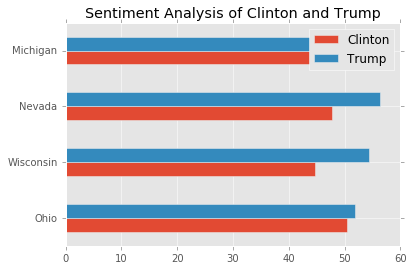

In [6]:
import csv
import pandas as pd

TM2=getScore('Trump_Michigan2.txt')
TN2=getScore('Trump_Nevada2.txt')
TW2=getScore('Trump_Wisconsin2.txt')
TO2=getScore('Trump_Ohio2.txt')

CM2=getScore('Clinton_Michigan2.txt')
CN2=getScore('Clinton_Nevada2.txt')
CW2=getScore('Clinton_Wisconsin2.txt')
CO2=getScore('Clinton_Ohio2.txt')

data = {"Trump":[TO2,TW2,TN2,TM2],"Clinton":[CO2,CW2,CN2,CM2]}
DF = pd.DataFrame(data,index=["Ohio","Wisconsin","Nevada","Michigan"])
#print(DF)

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')  

DF.plot(kind="barh")
plt.title("Sentiment Analysis of Clinton and Trump")

As the function randomly search and select the twitter, the texts and files we 